#Importing Required Libraries
* Imporitng the required libraries and mounting the drive to train and evaluate the model

In [ ]:
#  Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Loaded Preprocessed data
RNNs expect 3D input, But the data not in time-series so treat each sample as a sequence of features

In [ ]:
X_train = np.load("/content/drive/MyDrive/PG-PROJECT/X_train.npy")
X_val   = np.load("/content/drive/MyDrive/PG-PROJECT/X_val.npy")
X_test  = np.load("/content/drive/MyDrive/PG-PROJECT/X_test.npy")

y_train = np.load("/content/drive/MyDrive/PG-PROJECT/y_train.npy")
y_val   = np.load("/content/drive/MyDrive/PG-PROJECT/y_val.npy")
y_test  = np.load("/content/drive/MyDrive/PG-PROJECT/y_test.npy")

# Reshape input: treat each feature as a timestep

In [ ]:
# Reshape loaded data for RNN input
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_rnn   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_rnn  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build TabulaRNN Model

In [ ]:
model_rnn = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,502 (25.40 KB)

 Trainable params: 6,502 (25.40 KB)

 Non-trainable params: 0 (0.00 B)

#Train Model

In [ ]:
early_stop_rnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_rnn = model_rnn.fit(
    X_train_rnn, y_train,
    validation_data=(X_val_rnn, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_rnn],
    verbose=1
)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7185 - loss: 0.7764 - val_accuracy: 0.9634 - val_loss: 0.1257
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9473 - loss: 0.1450 - val_accuracy: 0.9654 - val_loss: 0.0913
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9595 - loss: 0.1000 - val_accuracy: 0.9858 - val_loss: 0.0486
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9742 - loss: 0.0678 - val_accuracy: 0.9732 - val_loss: 0.0566
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9756 - loss: 0.0617 - val_accuracy: 0.9886 - val_loss: 0.0305
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9779 - loss: 0.0562 - val_accuracy: 0.9573 - val_loss: 0.1491
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9760 - loss: 0.0612 - val_accuracy: 0.9939 - val_loss: 0.0266
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9815 - loss: 0.0513 - val_accuracy: 0.

# Evaluate Model and Accuracy

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
TabulaRNN Test Accuracy: 99.43%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1127
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00      1044
           3       0.97      0.95      0.96       130
           4       0.95      0.98      0.97       129
           5       0.89      0.85      0.87        20

    accuracy                           0.99      2459
   macro avg       0.94      0.96      0.95      2459
weighted avg       0.99      0.99      0.99      2459



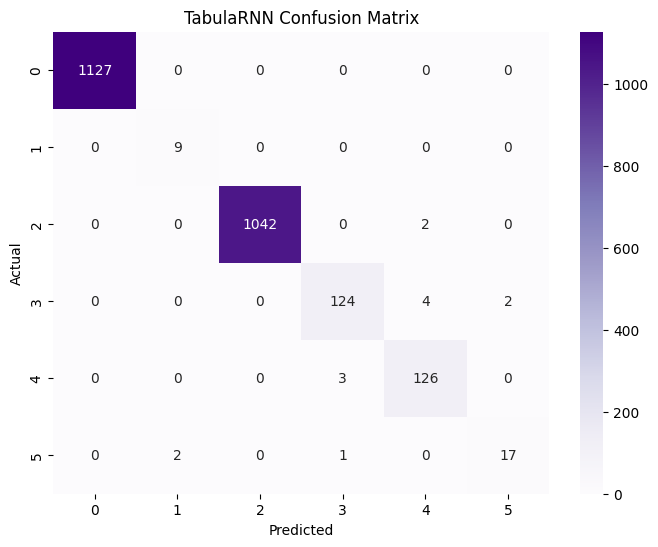

In [ ]:
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Accuracy
acc_rnn = accuracy_score(y_test, y_pred_classes_rnn)
formatted_acc = "{:.2f}%".format(acc_rnn * 100)
print("TabulaRNN Test Accuracy:", formatted_acc)

# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred_classes_rnn))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes_rnn), annot=True, fmt='d', cmap='Purples')
plt.title("TabulaRNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Plot training history

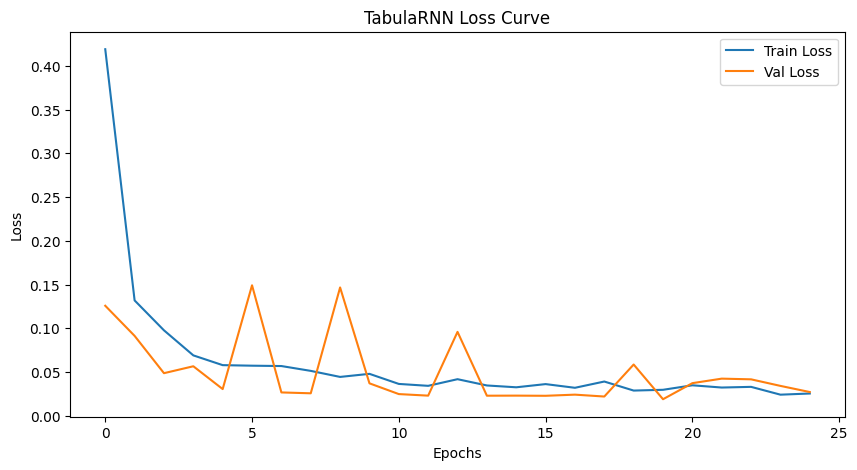

In [ ]:
# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title("TabulaRNN Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy

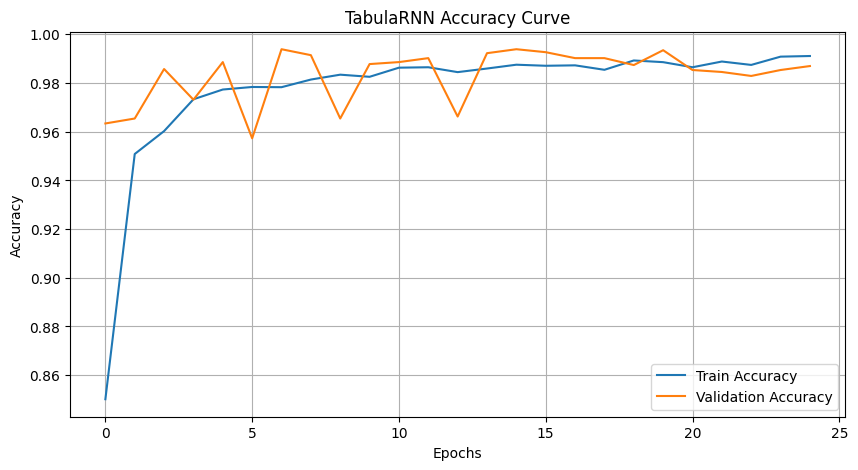

In [ ]:
# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("TabulaRNN Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

#Cohen’s Kappa Score`

In [ ]:
#Cohen’s Kappa Score
kappa_rnn = cohen_kappa_score(y_test, y_pred_classes_rnn)
print(" Cohen's Kappa Score:", round(kappa_rnn, 4))


 Cohen's Kappa Score: 0.9906


#Save model

In [ ]:
#Save Model and Measure Size
model_rnn.save("tabularnn_model.h5")
size_bytes = os.path.getsize("tabularnn_model.h5")
size_mb = size_bytes / (1024 * 1024)
print("TabulaRNN Model Size:", round(size_mb, 2), "MB")

TabulaRNN Model Size: 0.11 MB
